In [ ]:
import numpy as np
from loguru import logger
from glob import glob
import os
import os.path as osp
import mmcv
from avcv.coco import *

import argparse

datasets = [
    # ('/data/DMS_Behavior_Detection/Action_Eating_frames/annotations/instances_default.json', 
    #     '/data/DMS_Behavior_Detection/Action_Eating_frames/images', 'behavior'),
    ('/data/cvat-annotations/27_20_2022/train.json', '/data/cvat-raw-images/', 'cvat_train'),
    ('/data/DMS_Behavior_Detection/Mobile_Cigarret_DB/mobile_cigarette_train_081522_finetuning.json', 
        '/data/DMS_Behavior_Detection/Mobile_Cigarret_DB/', 'behavior'),
    ('/data/DMS_Behavior_Detection/Mobile_Cigarret_DB/mobile_cigarette_val_080422.json', 
        '/data/DMS_Behavior_Detection/Mobile_Cigarret_DB/', 'behavior'),
    # ('/data/public/coco/annotations/instances_train2017.json', '/data/public/coco/train2017/', 'behavior'),
    # ('/data/public/coco/annotations/instances_val2017.json', '/data/public/coco/val2017/', 'behavior'),
    ('/data/full-version-vip-pro/annotations/train.json', '/data/full-version-vip-pro/DMS_DB_090922/', 'face')
]
new_root_dir = '/data/DMS_Behavior_Detection/annotations/'
new_img_dir = '/data/DMS_Behavior_Detection/images/'
mmcv.mkdir_or_exist(new_root_dir)

cats = []
for ann, _,_ in datasets:
    for cat in mmcv.load(ann)['categories']:
        cats.append(cat['name'])

print(sorted(set(cats)))

['cigarette', 'face', 'food/drink', 'left_eye', 'mouth', 'phone', 'right_eye']


In [ ]:
!rm -r {new_root_dir}

In [ ]:
category_old_to_new = {
    'cigarette':'cigarette',
    'food/drink':'food/drink',
    'phone':'phone',
    # 'cell phone': 'phone',
    # 'donut':'food/drink',
    # 'hot dog':'food/drink',
    # 'pizza':'food/drink',
    # 'wine glass':'food/drink',
    # 'orange':'food/drink',
    # 'cake':'food/drink',
    # 'banana':'food/drink',
    # 'sandwich':'food/drink',
    # 'apple':'food/drink',
    'left_eye':'left_eye',
    'right_eye':'right_eye',
    'mouth':'mouth',
    'face':'face'
}

categories = []
used_names = set()
for id, name in enumerate(category_old_to_new.values()):
    if not name in used_names:
        categories += [{'id':id+1, 'name':name} ]
        used_names.add(name)
    
name2cat = {cat['name']:cat for cat in categories}

In [ ]:
[_['name'] for _ in categories]

['cigarette', 'food/drink', 'phone', 'left_eye', 'right_eye', 'mouth', 'face']

In [ ]:

from avcv.all import *


out_dict = dict(
    images=[],
    annotations=[],
    categories=categories,
)


for json, img_dir, dname in datasets:
    cc = CocoDataset(json, img_dir)
    # cc.visualize();
    for img_id in cc.img_ids:
        img = cc.gt.imgs[img_id].copy()
        new_img_id = len(out_dict['images'])
        new_img = img.copy()
        new_img['id'] = new_img_id
        new_img['dataset_name'] = dname
        file_name = os.path.abspath(osp.join(cc.img_dir, img['file_name']))
        rel_path = os.path.relpath(file_name, new_img_dir)
        new_img['file_name'] = rel_path
        

        take = False
        for ann in cc.gt.imgToAnns[img_id]:
            ann = ann.copy()
            ann['image_id'] = new_img_id
            old_cat = cc.gt.cats[ann['category_id']]
            if old_cat['name'] in category_old_to_new:
                new_cat_name = category_old_to_new[old_cat['name']]
                new_cat = name2cat[new_cat_name]
                ann['category_id'] = new_cat['id']
                ann['id'] = len(out_dict['annotations'])
                ann['area'] = ann['bbox'][2]*ann['bbox'][3]
                out_dict['annotations'].append(ann)
                take = True
        if not '/public/coco' in new_img['file_name'] or take:
            if not 'width' in new_img:
                new_img['width'], new_img['height'] = Image.open(file_name).size
                
            out_dict['images'].append(new_img)
        # if get_name(file_name) == 'vietanh_phoneusage_0012':
        #     vis = cc.visualize(img_id)
        #     new_cc = CocoDataset(out_dict, new_img_dir)
        #     new_vis = new_cc.visualize(new_img_id)

        #     mmcv.imwrite(np.concatenate([vis, new_vis], 1), 'vis.jpg')
            # import ipdb; ipdb.set_trace()


# train_coco, val_coco = split_coco(out_dict)
len(out_dict['images'])

49347

In [ ]:
# for ann in out_dict['annotations']:
#     ann['area'] = ann['bbox'][2]*ann['bbox'][3]

In [ ]:
# train_coco, val_coco = split_coco(out_dict)

In [ ]:
# len(train_coco['images']), len(val_coco['images'])

In [ ]:
train_json_out = osp.join(new_root_dir, 'food_face_train_27_09_2022.json')
# val_json_out = osp.join(new_root_dir, 'food_face_val.json')
mmcv.dump(out_dict, train_json_out)
# mmcv.dump(val_coco, val_json_out)

In [ ]:
train_json_out, new_img_dir

('/data/DMS_Behavior_Detection/annotations/food_face_train_27_09_2022.json',
 '/data/DMS_Behavior_Detection/images/')

2022-09-27 03:21:15.805 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=16138
2022-09-27 03:21:15.840 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=25195
2022-09-27 03:21:15.883 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=20501
2022-09-27 03:21:15.927 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=7792
2022-09-27 03:21:15.947 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


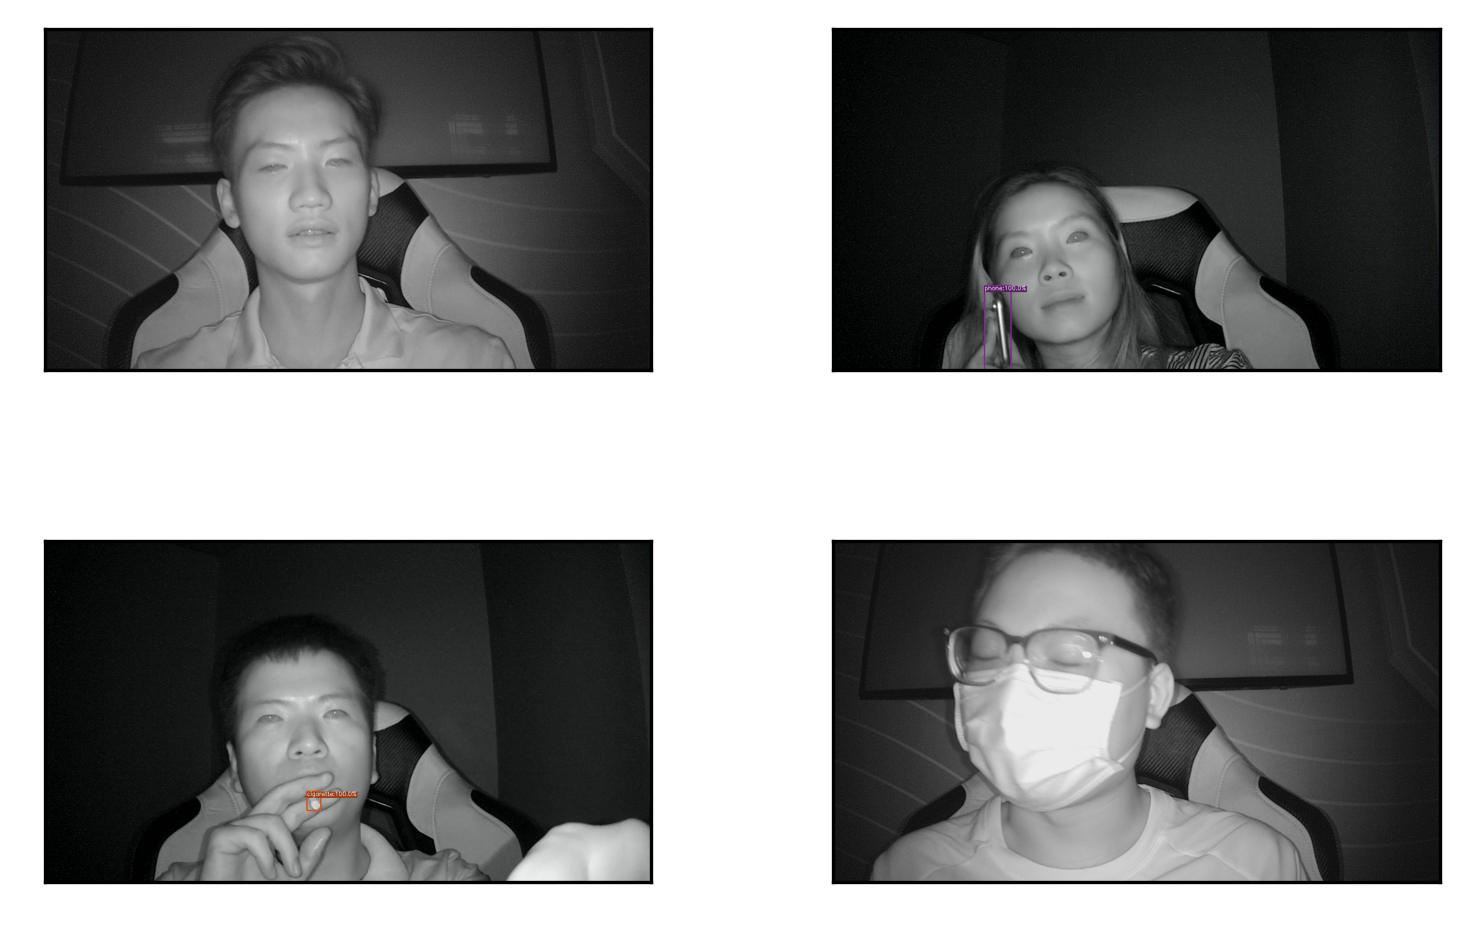

2022-09-27 03:21:17.164 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=28555
2022-09-27 03:21:17.609 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=2220
2022-09-27 03:21:17.638 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=22944
2022-09-27 03:21:17.679 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=48344
2022-09-27 03:21:17.700 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


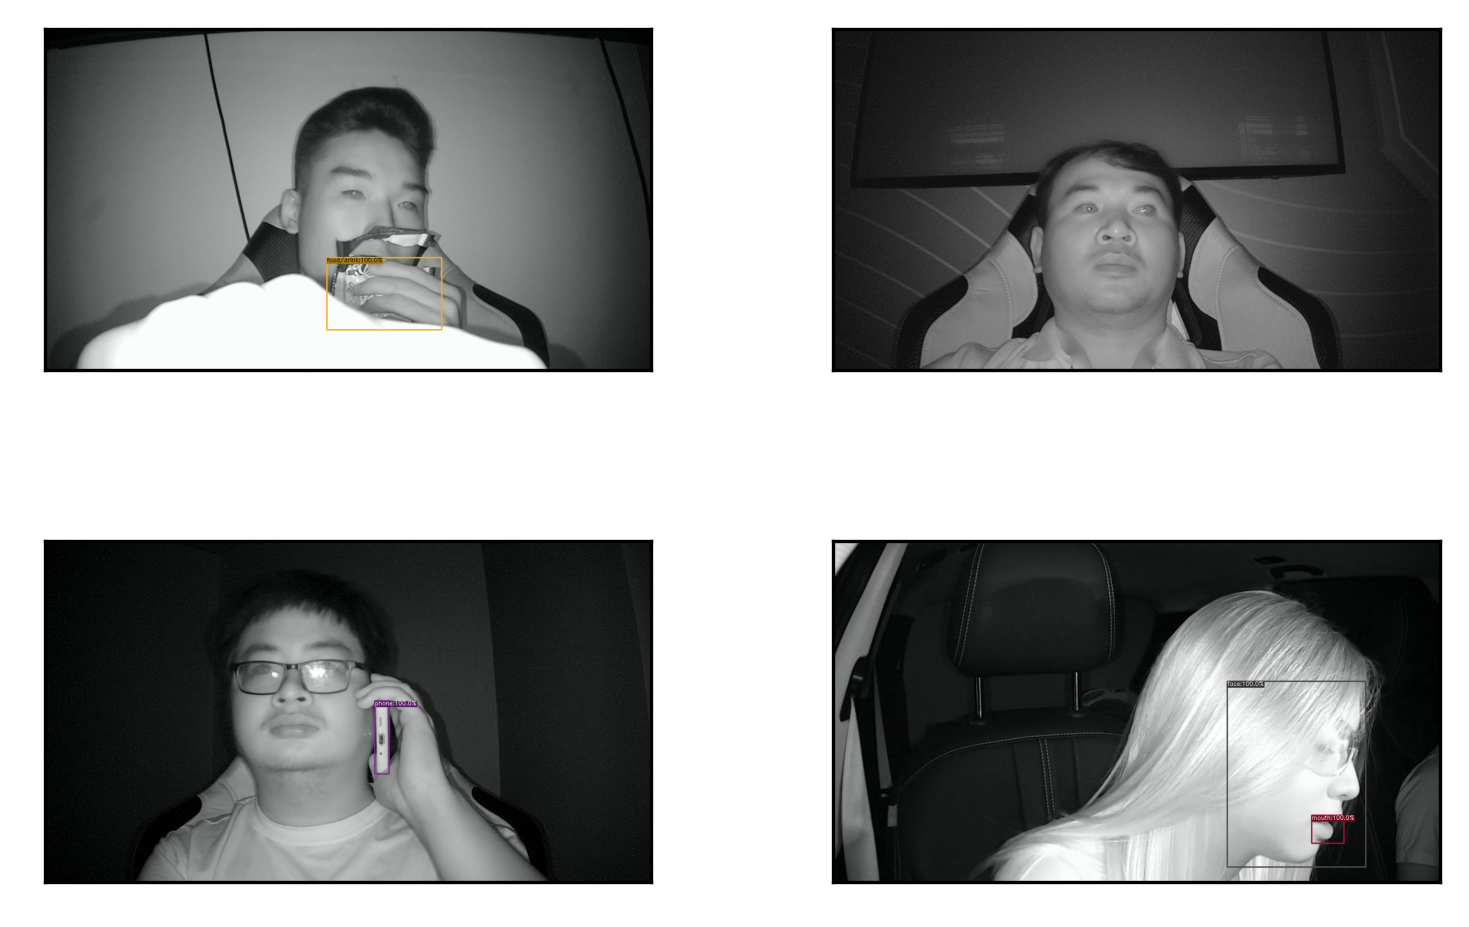

2022-09-27 03:21:18.879 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=7140
2022-09-27 03:21:18.906 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=38987
2022-09-27 03:21:18.934 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=28780
2022-09-27 03:21:18.957 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=17135
2022-09-27 03:21:18.973 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


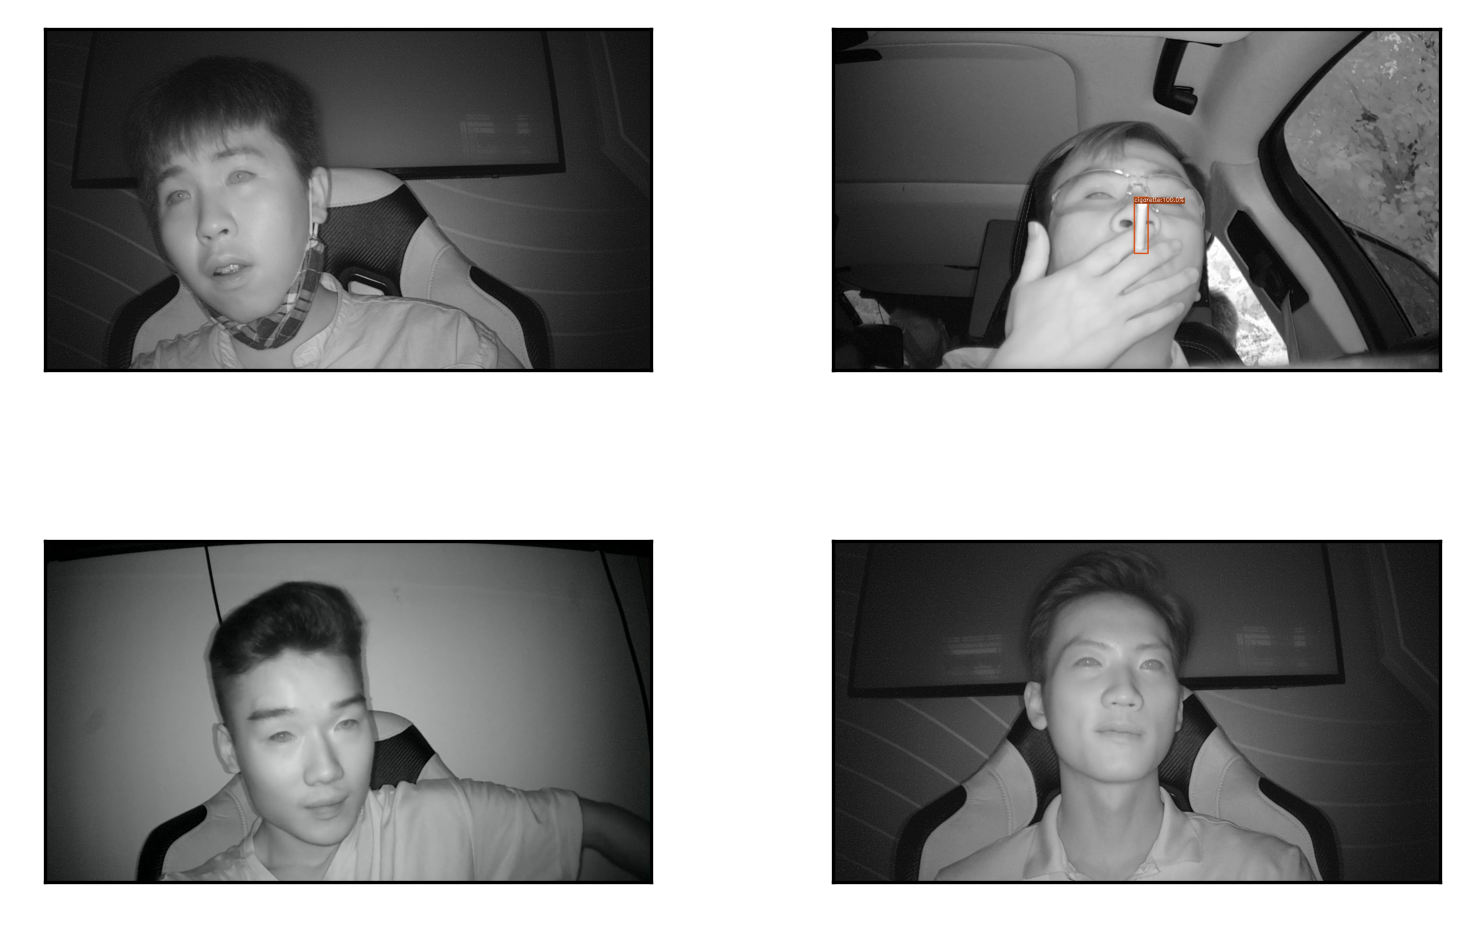

2022-09-27 03:21:20.157 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=27546
2022-09-27 03:21:20.200 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=7059
2022-09-27 03:21:20.223 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=17424
2022-09-27 03:21:20.252 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=10416
2022-09-27 03:21:20.275 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


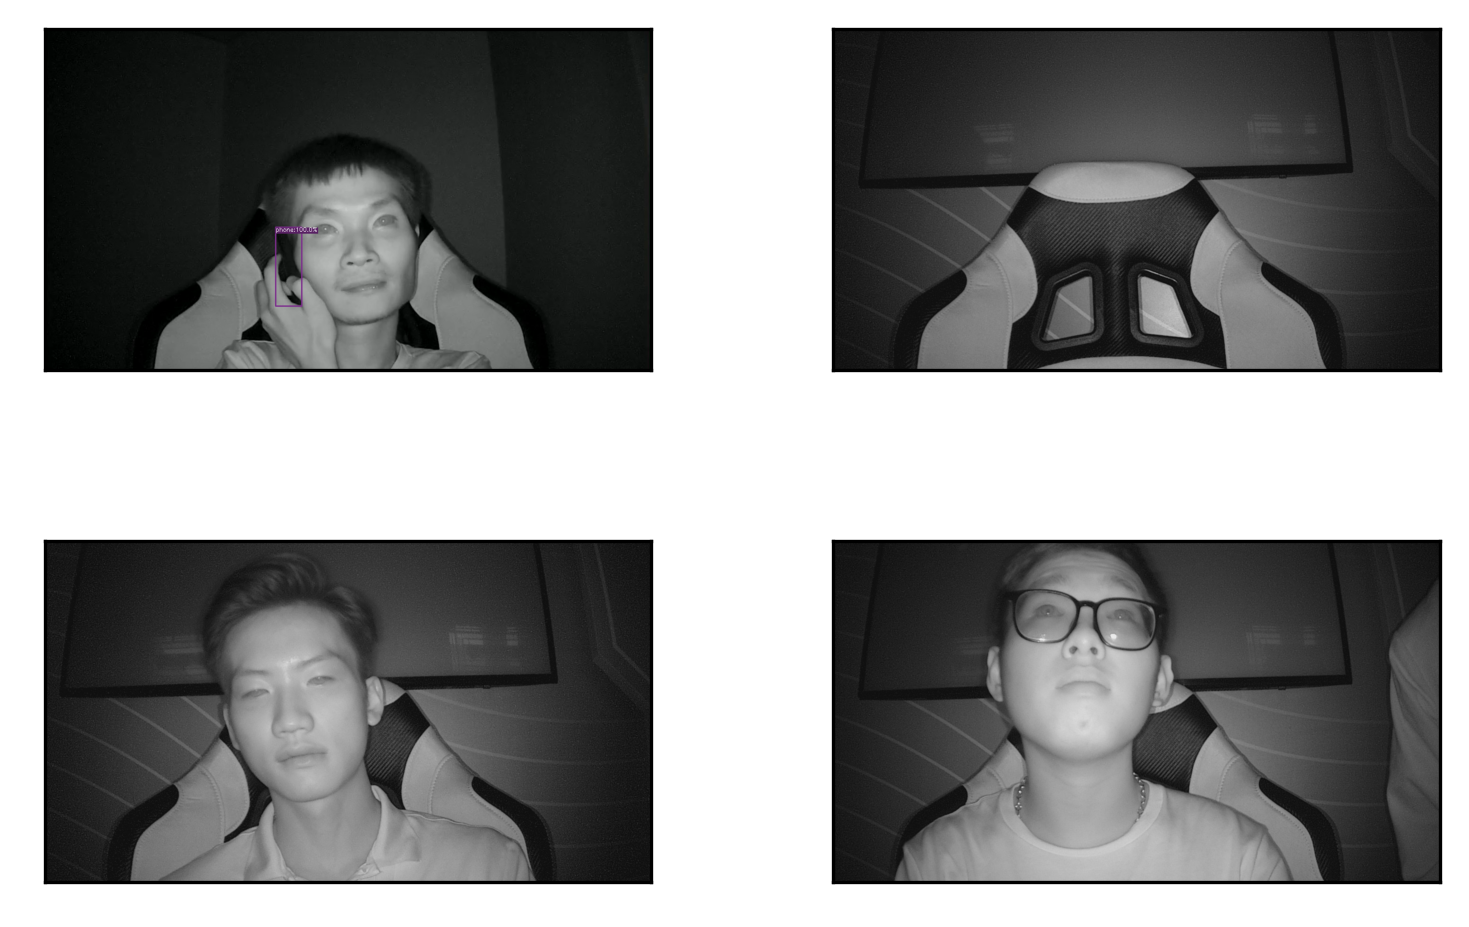

2022-09-27 03:21:21.418 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=42718
2022-09-27 03:21:21.448 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=32657
2022-09-27 03:21:21.497 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=40475
2022-09-27 03:21:21.529 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=3468
2022-09-27 03:21:21.555 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


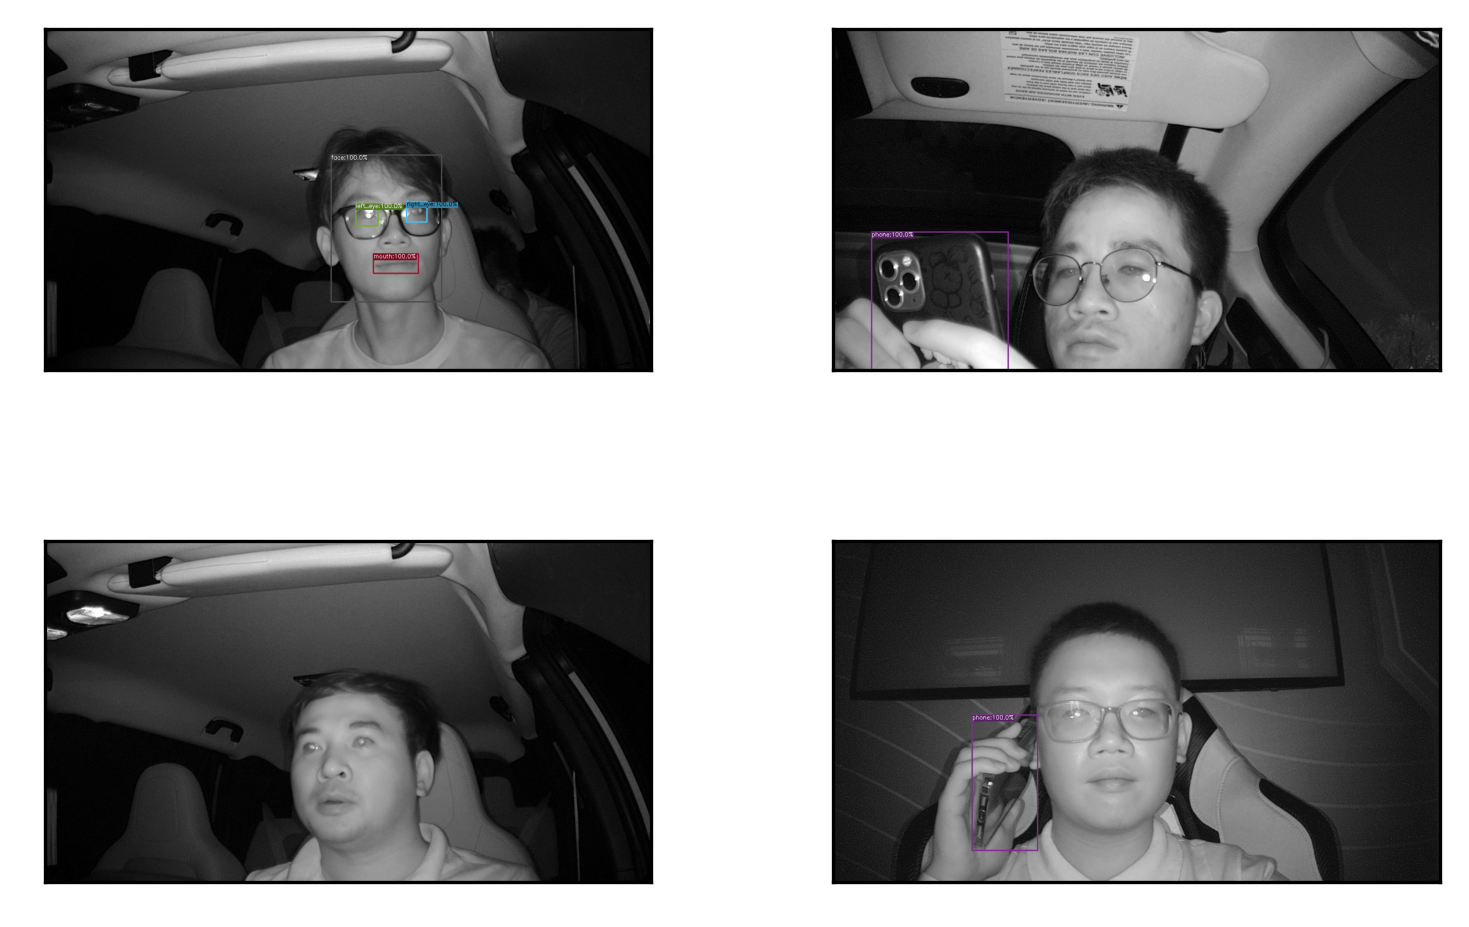

In [ ]:
cc = CocoDataset(train_json_out)
vis_imgs = []
for i in range(20):
    vis_imgs.append(cc.visualize(show=0))
    if len(vis_imgs) == 4:
        plot_images(vis_imgs)
        vis_imgs = []

In [ ]:
# cc.img_dir

In [ ]:
# cc.visualize(show=1);

In [ ]:
# img2cats = {img_id:set() for img_id in cc.img_ids}
# for img_id in cc.img_ids:
#     anns = cc.gt.imgToAnns[img_id]
#     for ann in anns:
#         img2cats[img_id].add(ann['category_id'])

In [ ]:
# pd.DataFrame.from_dict(img2cats, orient='index')